In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [128]:

def read_csv(file_path):
    '''
    Read CSV file and return data as numpy array
    '''
    df = pd.read_csv(file_path)
    data = np.array(df,dtype=object)
    data = data.astype(float)
    return data

In [129]:
data = read_csv("init_demo.csv")
data.shape

(16, 300)

In [130]:
def find_max(data, var):
    current_max = 0
    vars = {"x": 0, "y": 1, "z": 2}
    for i in range(data.shape[0]):
        frame = data[i]
        frame = frame.reshape((-1, 4))
        for j in range(frame.shape[0]):
            if frame[j][vars[var]] > current_max:
                current_max = frame[j][vars[var]]
    
    return current_max
find_max(data, "x")

0.8602175712585449

In [131]:
def initialize_matrix_for_frame(data, idx, x_dim, y_dim):
   
    # create a matrix of all zeros
    matrix = np.zeros((x_dim,y_dim))
    # fill the matrix with random values
    frame = data[idx]
    frame = frame.reshape((-1, 4))
    for j in range(len(frame)):
        matrix[int(frame[j][0] * 1000)][int(frame[j][1] * 1000)] = j
    return matrix

In [132]:
matrix = initialize_matrix_for_frame(data, 0)

TypeError: initialize_matrix_for_frame() missing 2 required positional arguments: 'x_dim' and 'y_dim'

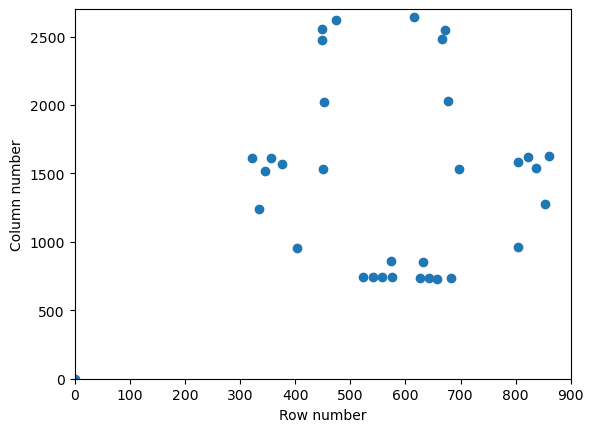

In [101]:
# plot the matrix
coords = np.nonzero(matrix)

# Plot the non-zero elements
plt.scatter(coords[0], coords[1])

# Set the x and y limits
plt.xlim(0, matrix.shape[0])
plt.ylim(0, matrix.shape[1])

# Set the labels for the axes
plt.xlabel('Row number')
plt.ylabel('Column number')

# Show the plot
plt.show()

In [138]:
def generate_tensor(data, sliding_window_size=10):
    # check for max value in x and y, which will then be used for the shape of the matrix
    max_x = find_max(data, "x") * 1000
    max_y = find_max(data, "y") * 1000
    x_dim = round(math.ceil(max_x/100)*100, -1)
    y_dim = round(math.ceil(max_y/100)*100, -1)
    
    for i in range(len(data) - sliding_window_size + 1):
        print(i, len(data) - sliding_window_size + 1)
        tensor = np.zeros((sliding_window_size, x_dim,y_dim))
        print(type(tensor))
        for j in range(i, i + 10):
            new_matrix = initialize_matrix_for_frame(data, j, x_dim, y_dim)
            tensor[j-i] = new_matrix
        yield tensor
    

In [157]:
tensor_gen = generate_tensor(data, sliding_window_size=10)
tensor = next(tensor_gen)
tensor.shape

0 7
<class 'numpy.ndarray'>


(10, 900, 2700)

In [135]:
tensor = np.zeros((2,2,3))
tensor[0]= [[1,2,3], [4,5,6]]
tensor

array([[[1., 2., 3.],
        [4., 5., 6.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

In [73]:
int(data[0][0][0] * 1000)

IndexError: invalid index to scalar variable.